In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadeta.csv")
study_results = pd.read_csv("data/Study_results.csv")


In [3]:
# Combine the data into a single dataset
mouse_study = pd.merge(study_results,mouse_metadata, on="Mouse ID", how = "left")
# mouse_study = mouse_study.drop_duplicates()
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Check the number of mice
mouse_study["Mouse ID"].value_counts().count()


249

In [5]:
# HELP

mouse_study_duplicate = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"], keep = False)]
mouse_study_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study["Mouse ID"] != "g989"]
clean_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
clean_mouse_study["Mouse ID"].value_counts().count()

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_drugs = clean_mouse_study.groupby("Drug Regimen")
tumor = group_drugs["Tumor Volume (mm3)"]
tumor_mean = tumor.mean()
tumor_med = tumor.median()
tumor_var = tumor.var()
tumor_std = tumor.std()
tumor_sem = tumor.sem()

drug_summary_stats = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                   "Median Tumor Volume": tumor_med,
                                   "Tumor Volume Variance": tumor_var,
                                   "Tumor Volume Std. Dev": tumor_std,
                                   "Tumor Volume Std. Err": tumor_sem})
drug_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
group_drugs["Mouse ID"].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregations = {
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
}
agg_group_drugs = group_drugs.agg(aggregations)
agg_group_drugs

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

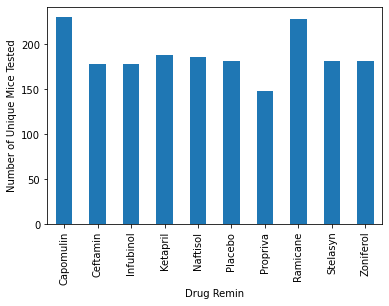

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg_count = group_drugs["Drug Regimen"].count()


drug_reg_count = drug_reg_count.plot(kind='bar')

drug_reg_count.set_xlabel("Drug Remin")
drug_reg_count.set_ylabel("Number of Unique Mice Tested")


plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Unique Mice Tested')

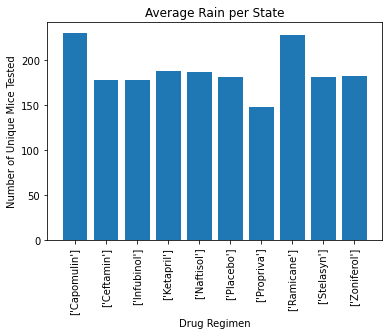

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
drug_reg = group_drugs["Drug Regimen"]

drug_reg = np.arange(len(drug_reg))


mice_tested = group_drugs["Mouse ID"].count()



plt.bar(drug_reg, mice_tested, align="edge")

tick_locations = [value+0.4 for value in drug_reg]
plt.xticks(tick_locations, group_drugs["Drug Regimen"].unique(), rotation="vertical")


plt.title("Average Rain per State")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

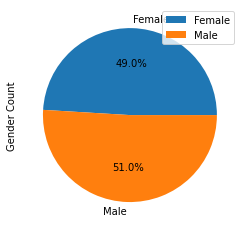

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_gender = clean_mouse_study.groupby("Sex")
gender_count=group_gender["Sex"].count()
gender_dist_df = pd.DataFrame({"Gender Count": gender_count})

gender_plot = gender_dist_df.plot.pie(y="Gender Count", autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x7fad3d2ff700>,
 [Text(0.03308201408261561, 1.0995024239828841, "['Female']"),
  Text(-0.0330820140826155, -1.0995024239828841, "['Male']")],
 [Text(0.018044734954153967, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

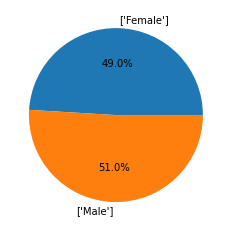

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(group_gender["Sex"].count(), labels=group_gender["Sex"].unique(), autopct="%1.1f%%")

In [15]:
 # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drugs = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"].isin(["Infubinol", "Capomulin", "Ramicane", "Ceftamin"]),:]
four_drugs_mouse = four_drugs.groupby("Mouse ID")


# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = four_drugs_mouse["Timepoint"].max()
max_time = pd.DataFrame({"Timepoint": max_timepoint})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(clean_mouse_study, max_timepoint, on= ["Mouse ID","Timepoint"])
merged_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
tumor_vol = merged_mouse_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_volume)
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_occupancy = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(f"{drug}'s potential outliers: {outlier_occupancy}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[Text(0.5, 0, 'Drug Regimen'),
 Text(0, 0.5, 'Final Tumor Volume (mm3)'),
 None,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')]]

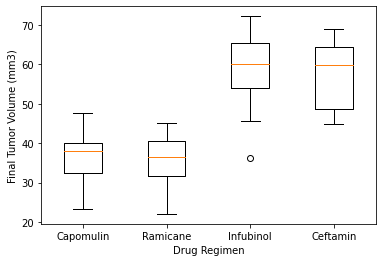

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

# ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list)

tick_locations = [drug for drug in treatment_list]


ax1.set(xlabel='Drug Regimen', ylabel='Final Tumor Volume (mm3)', axisbelow=True,
            xticklabels=[treatment_list[0], treatment_list[1], treatment_list[2], treatment_list[3]])


Choose a mouse to analyze its tumor progression using Capomulin. 
 Choices: 
['b128' 'j246' 'r554' 's185' 'b742' 'x401' 'l509' 's710' 'r157' 'u364'
 'j119' 'v923' 'w914' 'i738' 'r944' 'y793' 'g316' 'g288' 'l897' 'w150'
 't565' 'i557' 'm957' 'f966' 'm601'] 
 
 You chose mouse f966


Text(0.5, 1.0, 'Capomulin of mouse f966')

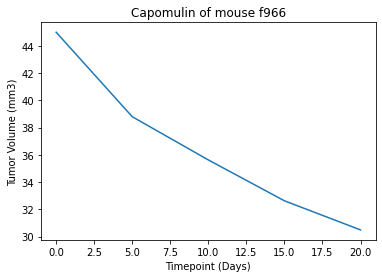

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_mouse = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == treatment_list[0],:]

unique_mice = cap_mouse["Mouse ID"].unique()

specific_mouse = input(f"Choose a mouse to analyze its tumor progression using {treatment_list[0]}. \n Choices: \n{unique_mice} \n \n You chose mouse ")

x_values = cap_mouse.loc[cap_mouse["Mouse ID"] == specific_mouse, "Timepoint"]
y_values = cap_mouse.loc[cap_mouse["Mouse ID"] == specific_mouse, "Tumor Volume (mm3)"]
plt.plot(x_values, y_values)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"{treatment_list[0]} of mouse {specific_mouse}")

In [193]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 
# four_drugs_mouse['Tumor Volume (mm3)'] = pd.to_numeric(four_drugs_mouse['Tumor Volume (mm3)'])
# four_drugs_mouse['Tumor Volume (mm3)'] = four_drugs_mouse['Tumor Volume (mm3)'].astype("float")
# merged_mouse_df["Average Tumor Volume (mm3)"]=four_drugs_mouse["Tumor Volume (mm3)"].mean()
# merged_mouse_df
# merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == treatment_list[3]
# avg_tumor_vol = merged_mouse_df["Tumor Volume (mm3)"].mean()
# mouse_weight = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == treatment_list[3], "Weight (g)"]

# weight_and_tumor_vol = avg_tumor_vol, mouse_weight
# weight_and_tumor_vol
# weight_and_tumor_vol.plot(kind="scatter", figsize=(20,3))
# four_drugs_mouse["Tumor Volume (mm3)"].mean()
# merged_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Average Tumor Volume (mm3)
0,u153,0,45.000000,0,Ceftamin,Female,11,25,NaN
1,b447,0,45.000000,0,Ceftamin,Male,2,30,NaN
2,x226,0,45.000000,0,Ceftamin,Male,23,28,NaN
3,t573,0,45.000000,0,Ceftamin,Female,15,27,NaN
4,c326,5,36.321346,0,Infubinol,Female,18,25,NaN
...,...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17,NaN
96,i177,45,33.562402,3,Ramicane,Male,10,18,NaN
97,r944,45,41.581521,2,Capomulin,Male,12,25,NaN
98,u364,45,31.023923,3,Capomulin,Male,18,17,NaN


In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen 